In [1]:
# import os
# import sys
# import time
# import serial
# import serial.tools.list_ports

# print('Search...')
# ports = serial.tools.list_ports.comports(include_links=False)
# for port in ports :
#     print('Find port '+ port.device)

# ser = serial.Serial(port.device)
# if ser.isOpen():
#     ser.close()

# ser = serial.Serial(port.device, 115200, timeout=1)
# ser.flushInput()
# ser.flushOutput()
# print('Connect ' + ser.name)

In [2]:
# while True:
#     try:
#         ser_bytes = ser.readline()
#         decoded_bytes = float(ser_bytes[0:len(ser_bytes)-2].decode("utf-8"))
#         print(decoded_bytes)
#     except:
#         print("Keyboard Interrupt")
#         break

## autoscan and detect com port

In [3]:
import numpy as np

import warnings
import serial
import serial.tools.list_ports

# close if any open session already going on
try:
    if ser.isOpen():
        ser.close()
except:
    pass

com_ports = [
    p.device
    for p in serial.tools.list_ports.comports()
    if 'CH340' in p.description  
]
if not com_ports:
    raise IOError("No CH340 found")
if len(com_ports) > 1:
    warnings.warn('Multiple CH340 found - using the first')

ser = serial.Serial(com_ports[0], 115200, timeout=1)
print(ser)

Serial<id=0x1b22218dc48, open=True>(port='COM3', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=1, xonxoff=False, rtscts=False, dsrdtr=False)


In [4]:
ports = list(serial.tools.list_ports.comports())
for p in ports:
    print (p)

COM3 - USB-SERIAL CH340 (COM3)


In [5]:
ser.flushInput()


for i in range(100):
    try:
        raw_data=str(ser.readline().decode("utf-8")).split(",")
#         print(raw_data)
#         raw_data = np.array(raw_data[2:-1]).astype(float)
        raw_data = [float(i) for i in raw_data[2:-1]]
        if len(raw_data)<11:  # make sure the data frame is complete/valid
#             print("....")
            continue
        print(raw_data)
    except:
        print("Keyboard Interrupt or RESET")
        pass
# ser.close()

Keyboard Interrupt or RESET
[34.67, -98.63, -1003.42, 0.66, 2.13, -0.98, -40.65, 75.3, -68.7, 29.9, 500.0]
[25.39, -112.79, -1007.81, 2.47, -2.73, 1.17, -39.0, 77.4, -68.55, 29.99, 19.608]
[20.51, -108.4, -1007.32, -1.85, 0.96, -0.73, -38.4, 76.5, -68.4, 29.75, 14.851]
[21.0, -96.19, -1009.77, 0.27, 0.66, -0.58, -37.95, 75.9, -67.5, 29.8, 13.245]
[21.0, -106.45, -997.56, 0.26, -0.53, 0.43, -39.9, 76.8, -69.0, 29.9, 12.438]
[38.09, -94.73, -993.65, -0.6, 0.99, 2.26, -39.45, 75.0, -67.2, 29.95, 11.952]
[26.86, -93.75, -1010.25, 3.24, -0.3, 1.48, -39.9, 75.3, -69.0, 29.99, 11.628]
[31.25, -105.47, -1006.84, -2.52, 2.21, -1.37, -39.0, 76.2, -69.15, 29.99, 11.396]
[29.3, -104.0, -1006.84, -0.24, 2.14, -0.15, -38.1, 75.0, -68.7, 29.95, 11.222]
[28.81, -103.52, -1003.42, 1.82, 1.74, 3.35, -39.15, 76.8, -69.45, 29.8, 11.086]
[21.97, -90.82, -998.05, 0.06, 3.19, -0.87, -39.45, 77.25, -67.95, 29.95, 10.978]
[40.53, -100.59, -1015.14, 2.07, 0.63, 0.56, -38.85, 76.8, -67.95, 30.09, 10.889]
[24.41,

## filtering
https://stackoverflow.com/questions/40423611/trying-to-use-madgwickahrs-python-script-but-cant-retrieve-the-new-calculated

sensor units | library units
--- | ---
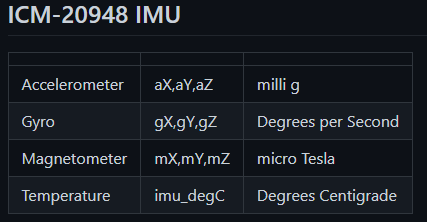 | 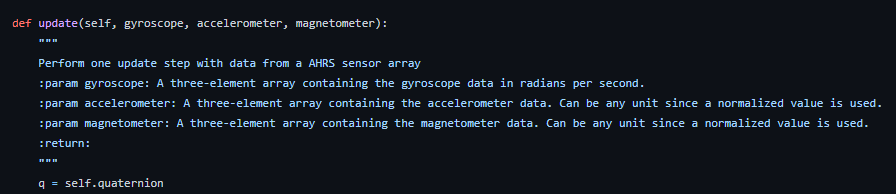


In [6]:
         #aX,      aY,     aZ,      gX,   gY,   gZ,    mX,    mY,   mZ, imu_degC,output_Hz,
data = [-19.53, -17.09, -1003.42, 1.77, -1.47, 2.38, -58.05, 87.0, -40.5, 25.87, 10.294]


In [7]:
# gyr = np.array( data[3:6])
# acc = np.array( data[0:3]) #unit doesnt matter
# mag = np.array( data[6:9]) #unit doesnt matter
# fs = np.array( data[-1] )  #sampling frequency
# gyr_rad = gyr * (np.pi/180)

gyr = np.array( [1.6, 0.6, 1.5])
acc = np.array( [1.2, 1.9, 1.3])
mag = np.array( [2.1, 1.3, 2.1])
gyr_rad = gyr * (np.pi/180)

### source
https://github.com/niru-5/imusensor

In [8]:
import os
import sys
import time


from imusensor.filters import madgwick

sensorfusion = madgwick.Madgwick(0.5)



# imu.caliberateGyro()
# imu.caliberateAccelerometer()
# or load your own caliberation file
#imu.loadCalibDataFromFile("/home/pi/calib_real4.json")

currTime = time.time()
print_count = 0

In [9]:
ser.flushInput()


for i in range(10000):
    try:
        raw_data=str(ser.readline().decode("utf-8")).split(",")
        #extract variables as float
        raw_data = [float(i) for i in raw_data[2:-1]]
        
        if len(raw_data)<11:  # make sure the data frame is complete/valid
#             print("....")
            continue
#         print(i," : ",raw_data)
        gyr = np.array( raw_data[3:6])
        acc = np.array( raw_data[0:3]) #unit doesnt matter
        mag = np.array( raw_data[6:9]) #unit doesnt matter
        fs = np.array( raw_data[-1] )  #sampling frequency
        gyr_rad = gyr * (np.pi/180)
        
        for i in range(10):
            newTime = time.time()
            dt = newTime - currTime
            currTime = newTime

            sensorfusion.updateRollPitchYaw(acc[0], acc[1], acc[2], 
                                            gyr_rad[0], gyr_rad[1], gyr_rad[2], 
                                            mag[0], mag[1], mag[2], dt)

        if print_count == 2:
            print ("{0:.2f}, {1:.2f}, {2:.2f}".format(sensorfusion.roll, sensorfusion.pitch, sensorfusion.yaw))
            print_count = 0

        print_count = print_count + 1
#         time.sleep(0.01)
        
        
    except Exception as e:
#         print(e)
#         print("Keyboard Interrupt or RESET")
        pass
##########################


-9.15, -12.91, -6.86
-17.77, -23.06, -8.17
-28.37, -32.13, -5.51
-42.02, -39.52, 1.41
-58.04, -45.01, 11.98
-78.63, -49.26, 28.08
-99.67, -50.80, 46.97
-119.46, -48.88, 66.36
-136.17, -43.17, 83.62
-147.76, -35.28, 96.12
-156.47, -25.74, 105.73
-163.69, -15.64, 112.53
-170.28, -4.83, 116.58
-172.37, -6.80, 113.55
-178.22, -2.70, 113.39
-173.47, -5.83, 115.47
-175.46, -4.65, 115.10
-174.95, -3.61, 114.31
-174.84, -4.50, 114.82
-174.66, -4.00, 115.18
-174.92, -3.82, 115.28
-174.46, -3.13, 115.24
-174.77, -2.56, 115.56
-175.66, -3.70, 114.95
-171.66, 2.01, 122.33
-176.10, -3.63, 113.62
-174.61, -5.30, 114.72
-176.56, -4.14, 114.52
-178.67, -3.72, 113.49
-173.37, -8.35, 115.82
-177.30, -3.68, 114.06
-174.99, -4.54, 114.33
-175.59, -6.01, 114.13
-177.75, -3.88, 113.83
-175.80, -4.96, 114.61
-175.58, -4.67, 114.82
-174.82, -4.36, 114.09
-175.46, -4.11, 114.91
-174.77, -3.81, 114.50
-174.74, -3.46, 114.87
-174.80, -3.70, 114.66
-174.33, -3.90, 114.72
-175.82, -5.52, 114.39
-176.84, -4.99, 114

103.98, 3.61, 143.95
102.70, 0.18, 149.52
98.15, 2.81, 153.13
98.39, 3.30, 156.46
98.67, 2.58, 159.03
98.47, 2.96, 162.05
98.59, 2.19, 165.71
98.74, 1.88, 170.08
95.92, 2.84, 176.92
95.67, 2.19, 178.79
96.37, 2.67, -179.40
96.08, 1.46, -177.85
94.97, 2.08, -176.08
94.97, 1.78, -174.75
93.86, 1.91, -173.44
93.88, 2.81, -172.35
92.51, 2.17, -171.39
92.61, 0.80, -169.37
91.92, 4.35, -167.57
99.48, -3.36, -164.42
92.63, 6.01, -164.72
91.91, 2.94, -164.07
92.38, 4.42, -163.60
92.12, 2.42, -163.11
92.44, 3.55, -162.65
92.46, 1.85, -162.15
92.68, 3.33, -161.95
92.93, 2.86, -161.88
92.68, 2.65, -161.79
92.92, 2.41, -161.43
91.92, 3.39, -161.42
92.21, 4.92, -161.10
91.30, 2.49, -160.94
91.94, 6.58, -160.93
91.55, -0.82, -159.57
90.70, 5.21, -160.48
90.82, 0.36, -159.27
90.24, 4.48, -159.59
90.14, 3.06, -159.44
99.12, 4.23, -158.43
98.31, 1.10, -158.19
98.19, 6.05, -157.29
98.43, 1.62, -157.03
95.24, 8.68, -157.76
91.67, 3.91, -158.02
91.73, 4.18, -158.31
91.75, 3.13, -158.42
91.80, 4.08, -158.9

-173.92, -0.54, 130.64
-172.65, 0.04, 131.31
-173.56, -0.27, 131.79
-172.83, -0.54, 130.78
-174.12, -0.82, 130.75
-178.12, -6.81, 133.38
-172.03, -8.15, 138.47
-174.22, 0.78, 143.06
-173.76, -0.40, 146.96
-171.27, 0.12, 146.32
-172.37, 0.47, 146.41
-172.11, -0.41, 146.10
-172.57, -0.50, 145.68
-172.82, -0.20, 145.15
-173.59, -1.06, 145.11
-173.60, -1.00, 144.54
-176.29, -3.37, 145.91
-175.78, -2.39, 143.74
-174.96, -1.99, 143.44
-175.70, -3.33, 143.99
-176.33, -2.73, 143.78
-176.14, -2.19, 143.61
-175.02, -2.67, 143.32
-176.15, -4.38, 143.49
-176.08, -4.05, 142.80
-179.36, -2.09, 142.95
-178.88, -1.13, 141.95
-176.65, -7.36, 143.99
-177.82, -0.15, 141.96
-179.09, -4.03, 142.87
-179.26, -1.81, 142.58
-172.31, -6.98, 145.77
-174.41, -5.94, 144.04
-171.57, -5.45, 140.33
-167.41, 2.61, 138.31
-169.04, 3.22, 133.52
-175.20, -3.36, 124.25
-176.28, -2.05, 123.09
-175.34, -3.45, 121.39
-174.88, -1.86, 117.29
-173.70, -5.50, 115.55
-179.19, -2.52, 115.43
-175.87, -7.94, 116.60
-175.96, -1.88, 1

-176.60, -3.10, 128.09
-175.90, -4.08, 126.56
-178.87, -1.59, 127.30
-177.72, 1.37, 127.91
-178.11, -1.13, 128.09
-177.10, -2.56, 127.87
-176.41, -5.29, 127.78
178.57, -1.29, 130.22
-172.45, -4.34, 127.38
-175.56, -4.67, 128.18
-177.70, -3.62, 128.47
-176.74, -3.42, 128.35
-177.37, -3.17, 128.26
-176.69, -2.12, 127.96
-176.61, -3.01, 128.52
-176.67, -2.06, 128.64
-175.59, -2.51, 128.98
-176.51, -2.19, 129.04
-175.88, -1.44, 128.97
-176.13, -2.06, 129.38
-175.73, -3.14, 127.98
-176.09, -3.57, 128.13
-177.25, -2.86, 127.83
-176.40, -2.69, 126.90
-168.88, -0.55, 128.74
-171.54, -0.33, 132.37
-171.05, 2.45, 132.03
-171.84, 1.56, 132.33
-169.05, 1.31, 131.38
-172.57, 1.70, 132.98
-172.79, 4.05, 132.93
-170.66, 1.31, 132.32
-171.71, 2.52, 132.53
-172.29, 2.36, 132.12
-173.16, 1.17, 132.08
-172.87, 1.32, 131.25
-173.53, 1.41, 130.99
-173.67, 0.13, 130.70
-173.38, 0.74, 131.71
-173.18, 0.50, 131.23
-173.30, 0.78, 130.98
-172.23, 1.34, 131.51
-172.95, 1.32, 131.55
-171.44, 1.57, 131.75
-172.33,

-177.27, -2.28, 143.66
-176.89, -2.31, 143.28
-176.76, -1.92, 143.96
-176.42, -2.33, 144.36
-175.92, -2.19, 144.23
-176.07, -1.99, 143.99
-175.60, -1.45, 144.24
-175.84, -1.63, 144.27
-175.39, -1.27, 144.73
-175.08, -1.39, 144.32
-174.71, -0.28, 144.30
-175.79, -2.47, 144.46
-176.22, -1.48, 144.15
-177.00, -3.44, 144.36
-177.22, -1.66, 143.24
-177.55, -3.30, 142.17
-178.73, -1.51, 142.44
-177.75, -6.17, 144.20
-177.48, -0.30, 141.57
-179.00, 4.16, 145.19
-177.49, -3.95, 143.14
-179.16, -1.74, 144.34
-178.54, -1.93, 144.05
-177.34, -3.10, 143.35
-176.76, -2.86, 143.45
-177.27, -2.37, 143.47
-176.86, -2.48, 144.14
-177.16, -2.44, 142.61
-175.68, -3.48, 142.01
-177.13, -3.89, 143.96
-177.92, -1.13, 142.77
-177.27, -2.98, 143.79
-178.03, -2.59, 143.99
-177.33, -2.05, 143.77
-177.89, -3.88, 142.88
-179.26, -3.61, 145.12
-175.72, -2.98, 142.01
-179.48, 1.60, 146.80
-177.18, -1.97, 143.11
-177.24, -4.74, 143.82
-177.37, 2.71, 141.23
-179.29, 0.04, 146.29
-177.89, -1.38, 142.20
-178.11, -2.21,

-175.46, -1.86, 113.46
-174.89, -1.95, 113.00
-175.17, -2.43, 114.05
-174.77, -2.09, 113.28
-174.68, -2.29, 113.80
-175.15, -2.38, 113.82
-174.63, -1.28, 113.30
-174.48, -1.41, 114.18
-174.54, -0.57, 112.99
-174.68, -0.90, 113.95
-173.89, -1.07, 113.42
-173.11, -2.53, 113.60
-174.85, -2.59, 113.38
-175.13, -3.64, 112.25
-176.20, -3.54, 112.27
-176.83, -5.49, 112.13
179.26, -0.97, 115.67
-170.37, -1.39, 112.87
-171.21, -3.20, 114.31
-171.91, -3.94, 114.13
-175.59, -3.39, 113.04
-177.40, -1.73, 112.77
-177.45, 1.30, 113.86
-176.47, -0.77, 113.05
-132.04, 8.30, 157.90
-139.46, 7.11, 148.54
-147.58, 4.93, 139.41
-156.07, 1.97, 130.73
-164.55, -1.13, 123.37
-175.46, -1.51, 115.64
-174.02, -1.35, 112.33
-175.98, -3.36, 112.58
-174.24, -3.58, 111.95
-176.57, -4.62, 112.02
-171.05, -4.75, 112.29
-178.83, -2.41, 111.82
-175.21, -4.45, 111.37
179.93, -3.78, 112.70
-168.39, -0.96, 113.78
-171.84, 1.74, 118.51
-172.27, 3.20, 116.17
-173.28, 3.91, 117.39
-171.84, 2.68, 116.75
-172.70, 2.51, 116.58


-176.54, -2.41, 127.71
-177.94, -3.24, 127.32
-173.37, -5.93, 127.67
-176.51, -2.59, 128.40
-176.50, -2.73, 128.23
-177.67, -3.80, 127.50
-177.03, -3.22, 126.93
-173.02, 4.22, 132.56
-170.90, 2.93, 131.26
-171.73, 1.64, 131.97
-172.02, 1.50, 131.27
-172.68, 0.95, 131.90
-172.62, 1.17, 131.44
-172.75, 1.22, 130.87
-172.71, 0.13, 131.39
-173.21, 0.82, 130.04
-173.38, -0.20, 131.42
-173.13, -0.06, 129.85
-171.83, 0.30, 131.18
-172.71, 0.41, 131.33
-173.17, 0.07, 130.58
-173.71, 0.67, 130.87
-171.50, 0.50, 128.72
-168.68, 2.11, 132.56
-168.49, 1.12, 140.39
-170.83, -1.76, 143.53
-168.74, 2.46, 146.11
-179.13, 0.69, 144.36
-175.01, -0.11, 142.14
-175.06, -0.06, 143.03
-175.27, -1.64, 144.07
-175.61, -0.66, 144.40
-174.73, 0.41, 144.31
-176.03, -1.03, 145.74
-175.38, -0.83, 143.04
-175.32, -1.05, 143.99
-175.09, -1.57, 144.05
-174.62, -1.23, 144.20
-175.95, -1.52, 144.66
-174.89, -1.50, 144.41
-174.73, -0.20, 143.97
-174.67, -1.42, 144.08
-176.23, -1.57, 144.12
-175.98, -1.52, 143.51
-176.30

-174.81, -3.14, 112.39
-175.79, -2.36, 112.75
-174.84, -2.63, 112.40
-174.61, -3.34, 112.62
-174.88, -3.30, 112.06
-176.81, -3.13, 112.24
-176.44, -2.92, 111.74
-174.93, -3.36, 111.28
-175.55, -4.28, 110.90
-178.97, -0.30, 110.83
-175.37, -4.18, 111.85
-172.68, -4.53, 111.20
-178.12, -2.57, 111.98
-175.32, -3.27, 111.95
-175.55, -3.04, 111.48
-175.19, -3.42, 112.21
-175.59, -4.16, 111.80
-176.53, -4.87, 111.59
-173.75, -2.86, 109.61
-179.09, -1.53, 115.53
-175.90, -1.27, 112.96
-176.65, -0.92, 113.02
-174.27, -1.45, 113.24
-174.24, -1.16, 112.49
-174.75, -1.22, 112.26
-175.63, -1.89, 112.46
-175.21, -2.60, 112.93
-176.10, -2.64, 112.59
-174.62, -3.38, 111.48
-175.62, -3.94, 111.10
-172.59, -4.87, 110.69
-179.97, 1.70, 111.91
-174.70, -4.90, 110.82
178.93, -0.91, 112.52
-173.19, -6.15, 112.78
-178.35, -1.00, 111.86
-177.60, -4.43, 111.93
-168.08, 2.44, 112.63
-174.20, 2.12, 116.34
-171.49, 3.39, 115.91
-168.17, -0.92, 111.27
-179.78, -3.69, 113.75
-171.95, 2.44, 112.93
-173.05, 1.49, 11

-172.53, 0.46, 145.74
-171.78, 0.97, 146.56
-171.80, 0.42, 145.97
-172.78, 0.96, 145.19
-173.72, -0.28, 145.33
-173.60, -0.78, 146.13
-171.87, 0.86, 146.06
-172.71, 1.11, 145.64
-171.35, 1.45, 146.40
-172.17, 1.24, 146.52
-171.75, 3.03, 146.90
-169.87, 0.90, 148.75
-170.44, 2.65, 147.17
-170.62, 1.56, 146.61
-171.55, 1.79, 146.86
-171.82, 0.43, 146.44
-172.95, 0.83, 145.75
-172.88, 0.17, 146.48
-172.84, 0.82, 146.01
-173.27, -0.08, 145.13
-174.54, -0.78, 145.38
-174.00, -0.87, 143.33
-176.22, -1.69, 144.67
-177.10, -2.65, 143.19
-176.85, -2.90, 143.26
-176.71, -3.33, 143.51
-176.75, -3.67, 143.10
-177.20, -2.51, 142.14
-177.91, -3.09, 143.16
-177.98, -2.34, 142.46
-179.74, 0.32, 144.65
174.30, 2.58, 145.00
173.07, 8.38, 143.29
170.88, 7.89, 142.12
170.28, 11.30, 140.78
169.57, 14.13, 139.18
169.35, 16.59, 137.45
169.99, 18.53, 135.71
170.36, 20.33, 133.67
170.90, 21.89, 131.45
171.72, 23.34, 129.15
172.67, 24.77, 126.75
173.62, 26.28, 124.18
174.66, 27.83, 121.46
175.92, 29.41, 118.64


-174.30, -0.30, 115.23
-173.37, -1.02, 115.30
-174.09, -1.08, 114.49
-174.41, -1.78, 116.04
-172.39, 0.72, 114.03
-172.62, 0.63, 116.85
-172.91, 0.49, 116.73
-173.90, 0.08, 116.15
-173.10, 0.15, 115.40
-172.81, 0.29, 116.54
-172.83, 0.16, 116.28
-172.03, 0.78, 116.83
-174.49, 1.99, 116.14
-172.25, 1.82, 117.19
-175.50, 3.68, 116.51
-174.96, 4.78, 114.67
-175.52, 5.76, 117.67
-174.25, 4.57, 121.69
-173.00, 0.21, 129.05
-174.59, 1.77, 132.58
-172.83, -0.31, 133.43
-173.45, -0.05, 133.06
-173.32, -1.20, 132.25
-173.68, -1.91, 131.70
-173.35, -1.85, 132.24
-173.71, -0.88, 132.69
-172.94, -1.17, 131.04
-173.40, -1.68, 132.87
-172.78, -0.25, 130.89
-172.70, -0.23, 133.53
-172.33, -0.02, 132.90
-172.39, 0.90, 133.85
-172.30, 0.67, 133.45
-171.40, 1.49, 134.09
-170.76, 0.52, 133.33
-171.58, 1.51, 134.83
-169.73, 1.37, 134.64
-172.92, 2.40, 134.61
-172.26, 1.83, 133.90
-172.66, 2.01, 133.21
-172.35, -0.09, 133.17
-172.41, -0.07, 132.55
-173.38, -0.62, 132.33
-173.44, -1.28, 132.69
-174.36, -0.8

-172.88, -1.23, 115.35
-173.73, -0.99, 115.41
-172.89, -0.34, 114.97
-172.96, -0.15, 116.13
-173.54, 0.07, 115.69
-172.49, 0.51, 115.98
-172.96, 0.60, 116.66
-173.09, 0.58, 115.46
-173.35, -1.26, 115.41
-173.97, -0.69, 115.75
-173.58, -0.69, 115.07
-173.67, -1.58, 114.24
-176.04, -4.07, 114.38
-175.19, -4.06, 113.41
-175.01, -3.52, 113.80
-173.75, -3.69, 113.76
-174.69, -3.13, 112.93
-175.73, -4.01, 113.62
-175.54, -4.19, 113.16
-174.71, -4.75, 112.93
-173.59, -4.97, 112.58
-176.35, -3.81, 113.48
-174.89, -3.70, 112.90
-174.69, -3.32, 113.56
-174.14, -4.40, 113.31
-176.71, -5.04, 113.35
-176.39, -6.09, 111.77
-170.24, 1.62, 118.52
-175.12, 3.53, 118.09
-169.82, 1.73, 115.97
-171.78, 1.58, 116.07
-171.83, 1.26, 117.28
-172.08, 0.83, 117.01
-172.93, 0.78, 116.47
-173.11, 0.94, 117.07
-171.67, 0.58, 116.47
-173.14, 0.34, 115.96
-173.06, -0.60, 115.69
-174.14, -1.12, 115.34
-174.14, -1.06, 115.26
-174.17, -0.83, 114.54
-173.97, -1.53, 117.20
-172.79, 0.36, 114.94
-172.60, -0.36, 116.42
-17

-173.93, -3.70, 112.81
-173.71, -5.53, 112.66
-178.37, -2.80, 112.54
-173.70, -6.07, 113.13
-174.96, -5.06, 113.38
-171.44, -6.66, 113.32
-177.32, -5.40, 112.32
-169.13, -5.31, 115.56
-169.48, 0.24, 116.08
-173.17, 2.03, 118.27
-171.91, 0.77, 117.15
-172.26, 0.87, 116.56
-173.47, 0.19, 116.19
-173.39, 1.20, 116.34
-172.67, 1.18, 117.07
-172.21, 0.64, 116.99
-173.09, -0.27, 116.30
-172.53, 0.14, 116.90
-172.95, 1.10, 117.04
-172.97, 0.72, 117.05
-172.80, -0.14, 115.94
-172.88, -1.08, 115.28
-173.56, -0.93, 116.35
-173.03, -0.17, 115.29
-173.06, -1.79, 115.07
-172.15, -2.79, 114.90
-172.67, -1.60, 114.95
-174.26, 0.02, 115.26
-173.28, -2.09, 115.77
-172.74, 0.39, 115.61
-172.98, 0.47, 116.43
-173.60, 0.63, 115.81
-172.85, -0.39, 114.98
-173.86, -1.17, 114.79
-174.77, -3.00, 114.19
-174.31, -2.95, 113.52
-174.86, -3.23, 113.82
-174.54, -3.51, 114.55
-174.93, -4.11, 113.09
-175.63, -5.09, 112.79
-173.40, -0.72, 119.25
-173.23, 2.80, 116.93
-173.48, 2.46, 116.95
-171.24, 0.24, 116.25
-172.4

-172.94, -1.15, 114.95
-172.55, 0.69, 115.39
-172.00, 0.71, 115.94
-173.34, 0.46, 116.32
-173.91, -0.88, 115.98
-172.72, -0.23, 114.59
-172.83, -0.43, 115.90
-173.02, -0.82, 115.87
-174.02, -0.92, 115.02
-174.04, -2.50, 113.67
-175.21, -3.43, 113.24
-175.36, -4.48, 113.83
-174.56, -3.75, 113.87
-175.05, -4.99, 113.19
-177.47, -4.52, 112.74
-173.68, -6.95, 114.00
-176.85, -4.53, 113.23
-174.75, -5.19, 113.54
-174.84, -5.10, 113.42
-176.12, -4.88, 113.48
-175.47, -4.91, 112.70
-176.38, -5.31, 113.86
-176.24, -4.92, 113.19
-176.55, -4.91, 113.22
-174.41, -5.13, 113.32
-174.05, -3.86, 113.08
-174.45, -5.71, 113.33
-175.71, -6.01, 112.37
-177.24, -4.92, 112.69
-175.68, -4.86, 112.40
-174.16, -1.09, 119.68
-170.83, 2.84, 116.29
-173.04, 2.17, 117.01
-173.40, 0.90, 116.32
-173.77, -0.34, 116.13
-173.66, 0.10, 116.24
-172.90, -0.49, 115.89
-172.85, -0.37, 116.45
-173.52, 0.02, 115.90
-173.27, -1.41, 115.56
-173.42, 0.50, 115.01
-173.30, -1.34, 116.14
-173.15, -0.06, 114.49
-172.24, -0.55, 115.

-174.21, -3.88, 113.56
-173.81, -3.43, 113.67
-175.00, -4.22, 113.24
-174.35, -4.46, 113.10
-175.25, -4.26, 114.05
-174.76, -5.13, 112.72
-176.48, -5.29, 111.80
-178.78, -5.38, 113.90
-174.03, -5.02, 112.54
-175.20, -5.15, 113.74
-176.39, -5.73, 113.10
-175.32, 4.68, 114.12
-173.11, 1.20, 116.01
-172.13, 1.40, 116.76
-170.53, 1.62, 116.51
-171.87, 1.29, 116.97
-173.85, 0.89, 116.87
-172.88, 1.95, 117.03
-172.37, 0.97, 116.96
-172.59, 0.19, 116.13
-173.36, 1.27, 116.37
-171.39, -0.06, 116.33
-173.32, -0.13, 115.97
-172.57, 0.85, 116.10
-171.81, 0.66, 116.75
-172.65, 0.94, 116.53
-172.30, -0.24, 115.51
-171.88, 0.24, 116.24
-172.05, 0.36, 116.85
-171.78, 0.51, 116.22
-173.02, -0.36, 115.81
-173.52, -1.06, 115.17
-173.05, 0.97, 115.01
-173.06, 0.19, 116.12
-173.07, -0.14, 115.78
-173.61, -1.64, 116.18
-171.83, 1.04, 115.75
-172.31, 0.36, 116.04
-172.62, -0.82, 115.37
-173.04, 0.30, 116.39
-172.27, 0.58, 116.55
-172.92, 0.88, 116.15
-173.28, -0.28, 115.59
-174.02, -1.12, 115.28
-173.85, -0